## Dry Bean Seed Classification

### Problem Statement

To develop a system for automatic detection of seven (7) types of dry bean seeds based on data captured using a high-resolution camera

### Loading the librabries

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2023-05-07 21:12:48 +01:00)


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import warnings
import joblib # to extract data


# Preprocessing of the data
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.datasets import make_classification
warnings.filterwarnings('ignore')

time: 2.7 s (started: 2023-05-07 21:12:48 +01:00)


In [3]:
# operating system
import os
os.getcwd()

'C:\\Users\\Transsnet'

time: 16 ms (started: 2023-05-07 21:12:50 +01:00)


### Loading the dataset

In [4]:
# Reading data from excel
df=pd.read_csv("Dry_Bean_Dataset.csv", index_col="Id")

time: 172 ms (started: 2023-05-07 21:12:50 +01:00)


In [5]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Id,,,,,,,,,,,,,,,,,
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON


time: 47 ms (started: 2023-05-07 21:12:51 +01:00)


**There are 13611 rows and and a total of 17 features.**

In [6]:
print(f'The bean classes are {df["""Class"""].unique()}')

The bean classes are ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
time: 0 ns (started: 2023-05-07 21:12:51 +01:00)


*There are 7 unique target classes*

In [7]:
# Get Data Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860154
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


time: 78 ms (started: 2023-05-07 21:12:51 +01:00)


## Data preprocessing

### Data cleaning
### Duplicates dropping

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [9]:
df.drop_duplicates(inplace=True)

time: 31 ms (started: 2023-05-07 21:12:51 +01:00)


In [10]:
#Checking if there are null values in the dataset
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

time: 0 ns (started: 2023-05-07 21:12:51 +01:00)


###### No missing values in the training dataset but we have to take into consideration if any missing data may appear in the test set.

## EDA


### 1- Count and distribution of all beans categories:

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


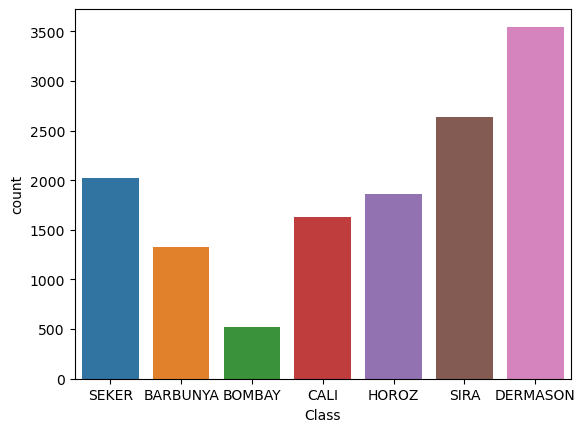

time: 266 ms (started: 2023-05-07 21:12:51 +01:00)


In [11]:
print(df['Class'].value_counts())
_ = sns.countplot(x='Class', data=df)

We can notice that there is a slight imbalance in the data we need to handle.

## 2- Distribution of numerical features:

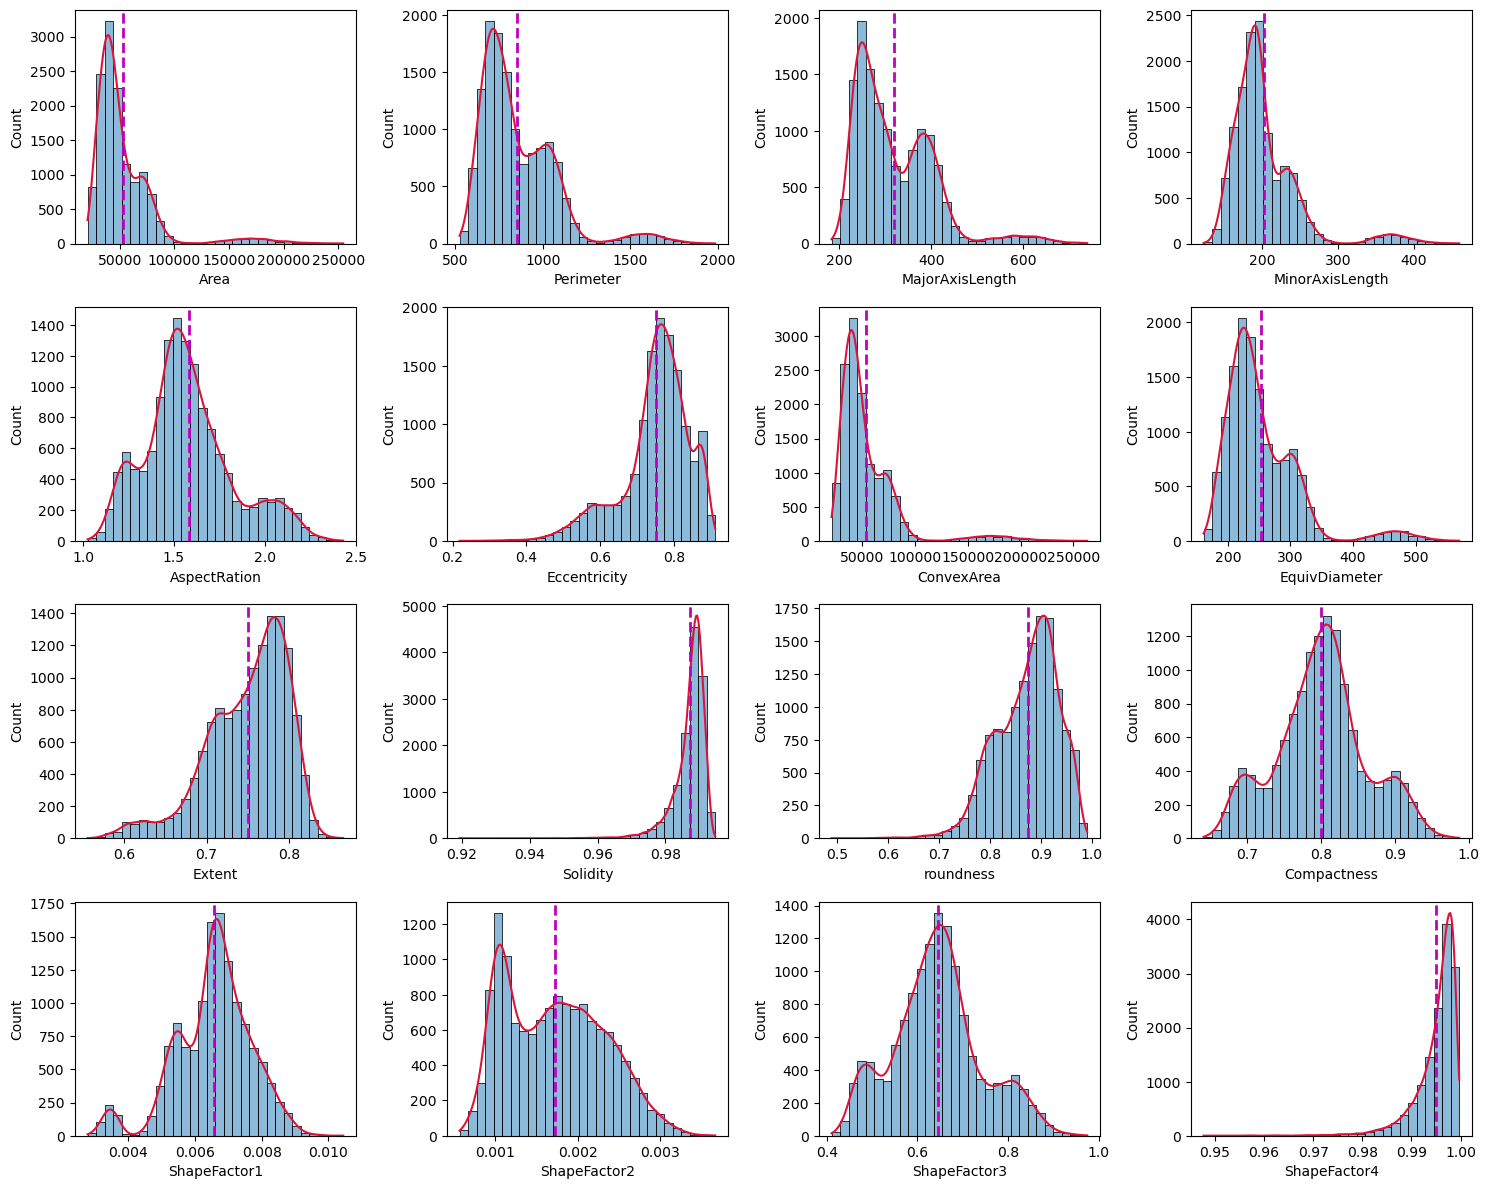

time: 5.64 s (started: 2023-05-07 21:12:51 +01:00)


In [12]:
Numeric_cols = df.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(df[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

- Some distributions have long tails and most are bi-modal which means that some bean classes should be quite distinct from others.

## 3- Boxplot of numerical features for each type of bean:

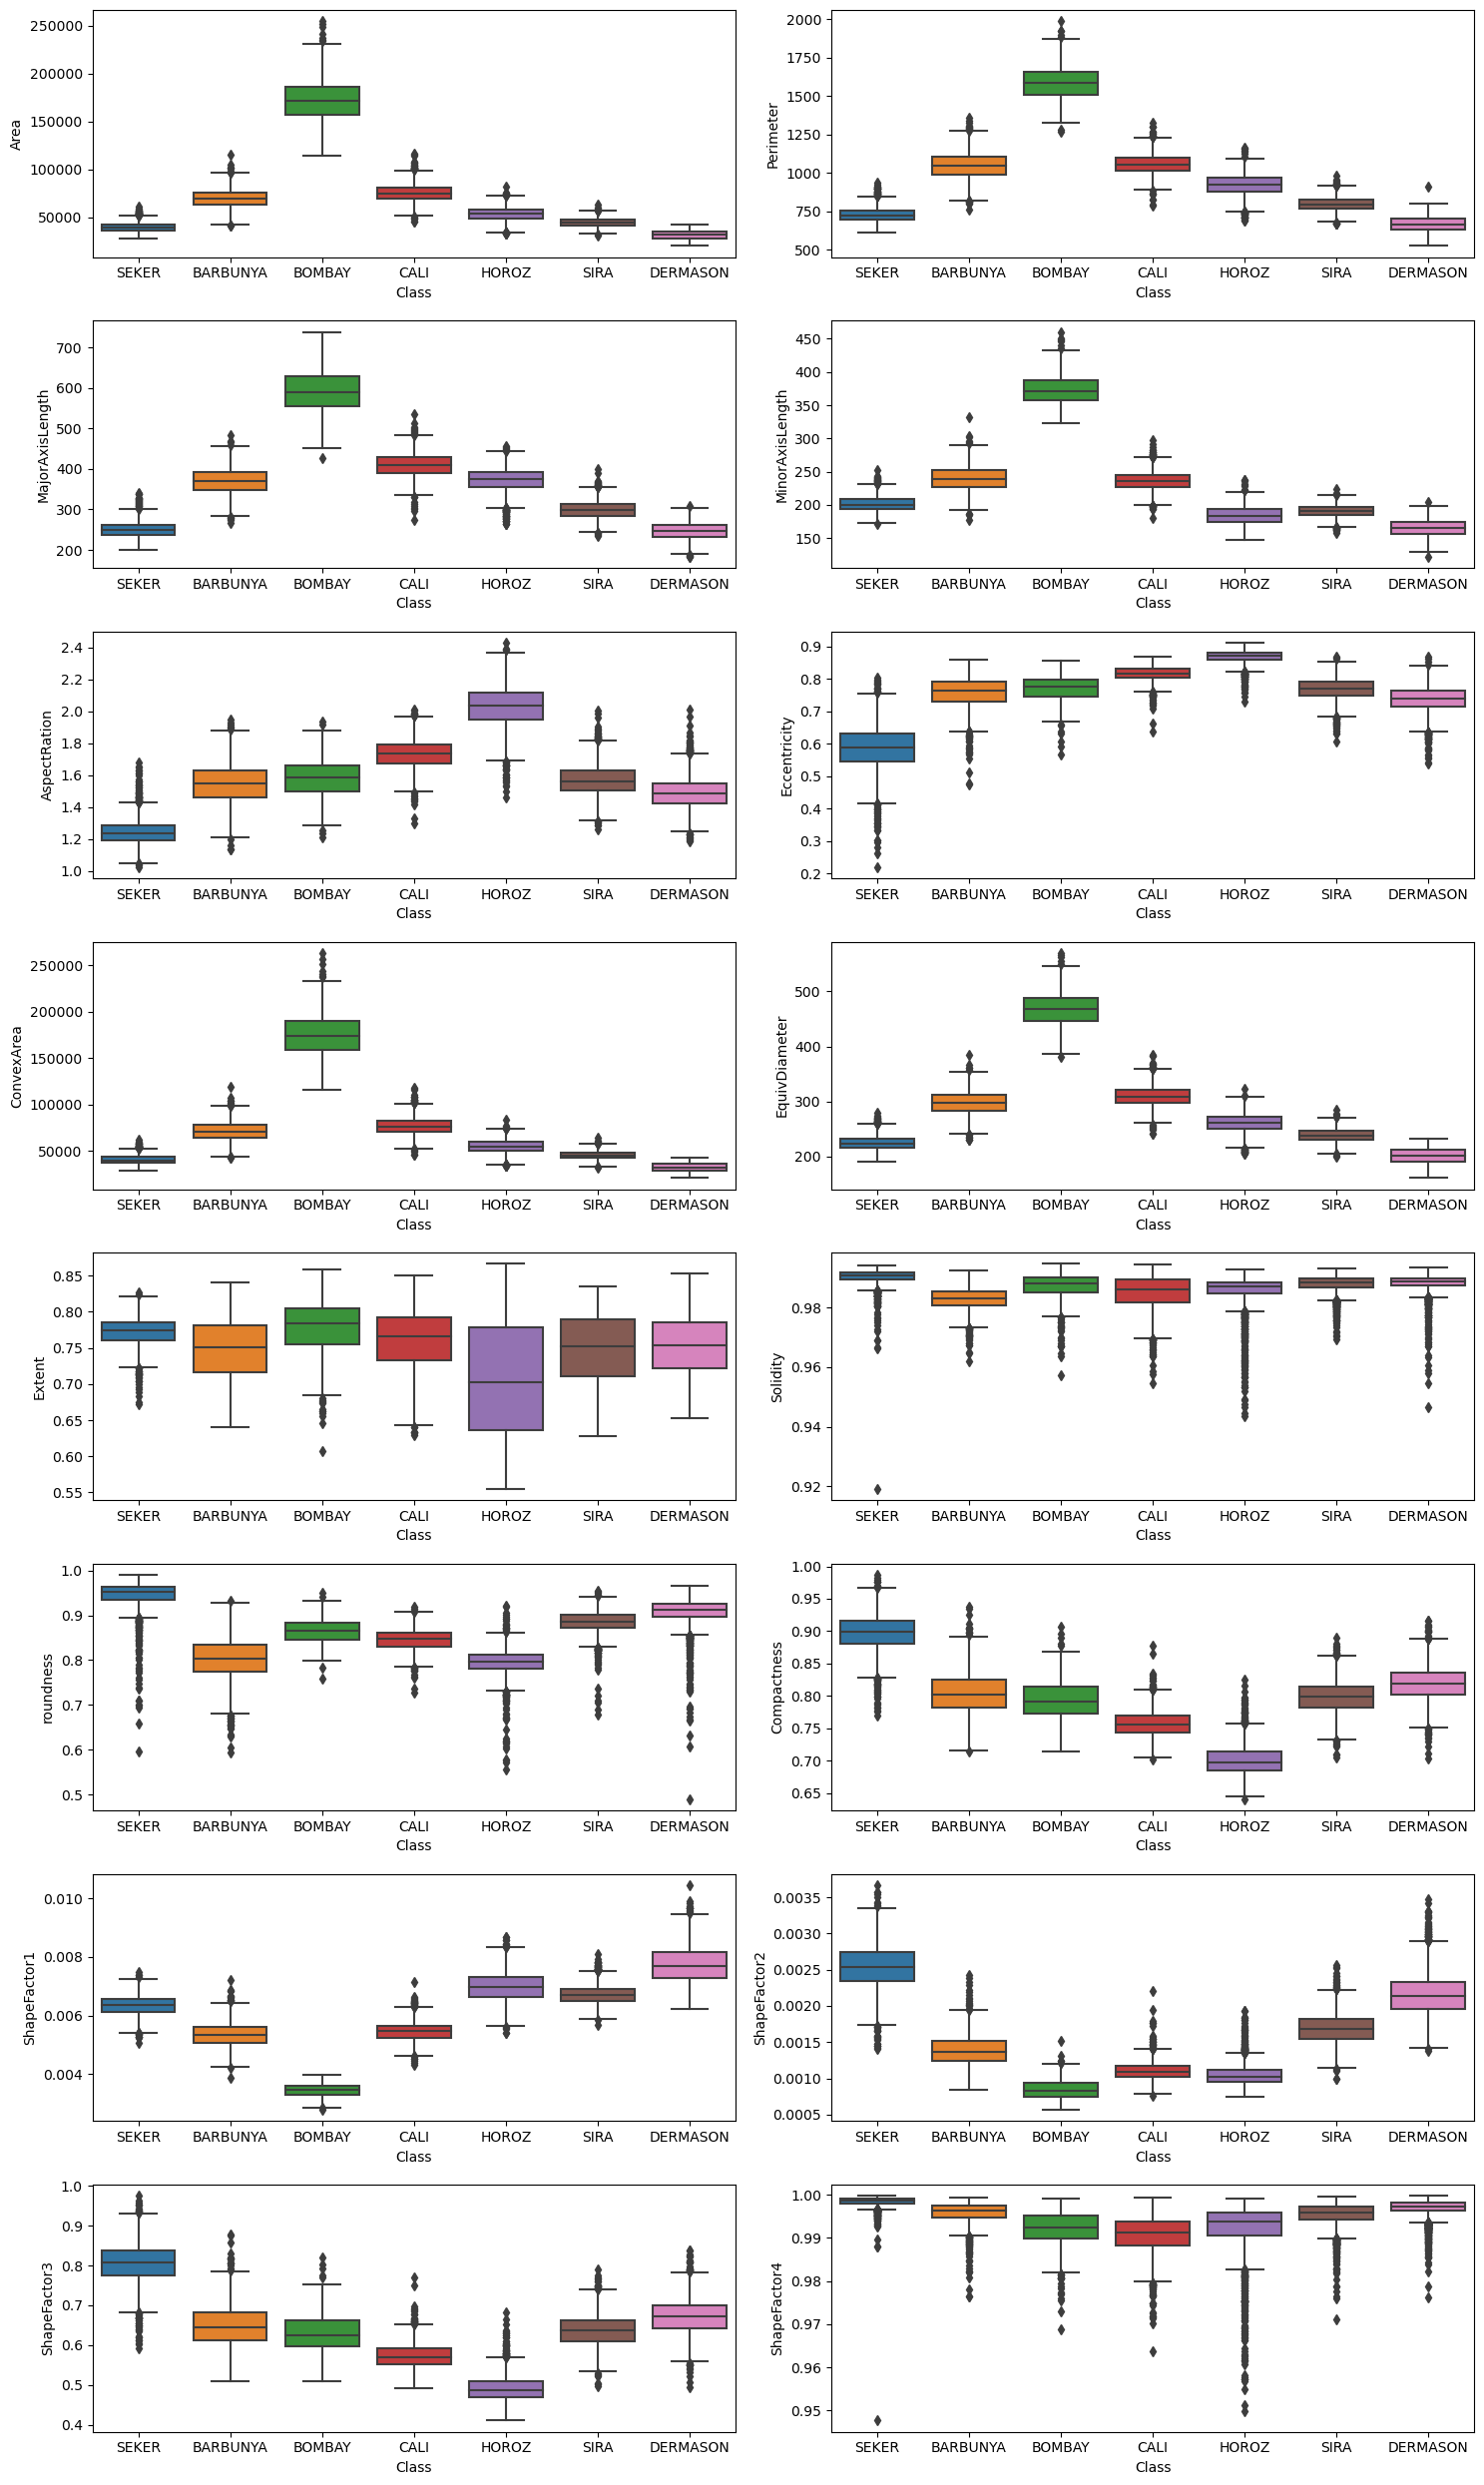

time: 4.58 s (started: 2023-05-07 21:12:57 +01:00)


In [13]:
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=df['Class'], y= df[variable], ax=subplot)
plt.tight_layout()

## Balancing the dataset: SMOTE

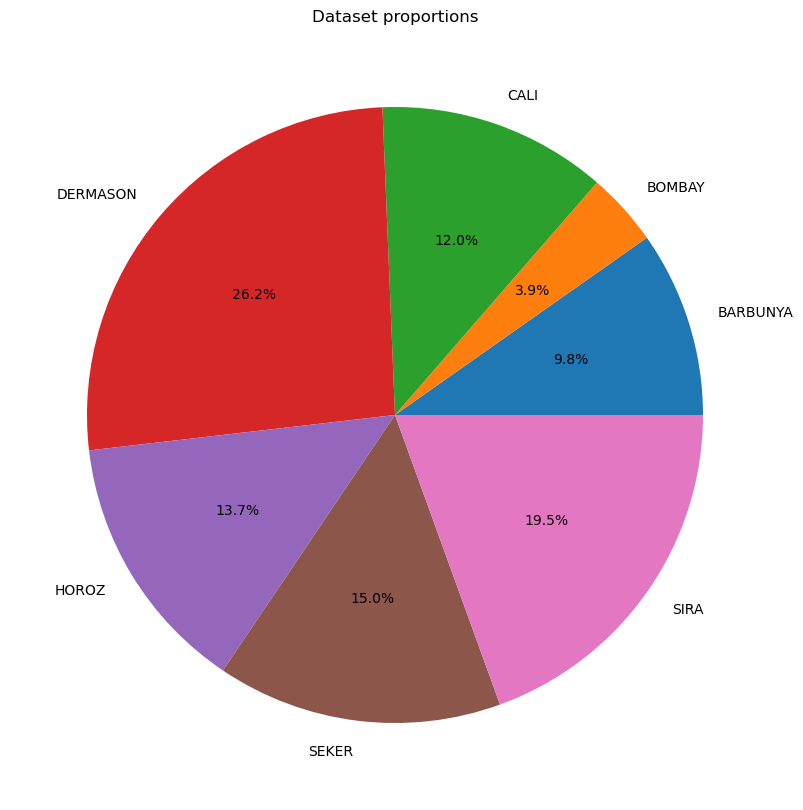

time: 266 ms (started: 2023-05-07 21:13:01 +01:00)


In [14]:
labels, counts = np.unique(df.Class, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

### Let's Try Balancing Data (SMOTE)

In [15]:
X = df.drop('Class', axis=1)
y = df.Class

time: 15 ms (started: 2023-05-07 21:13:02 +01:00)


In [16]:
len(y)

13543

time: 16 ms (started: 2023-05-07 21:13:02 +01:00)


In [17]:
from sklearn import preprocessing

time: 0 ns (started: 2023-05-07 21:13:02 +01:00)


In [18]:
le = preprocessing.LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df['Class'].unique()

array([5, 0, 1, 2, 4, 6, 3])

time: 32 ms (started: 2023-05-07 21:13:02 +01:00)


In [19]:
#One-Hot-Encoding
list(np.unique(y))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

time: 32 ms (started: 2023-05-07 21:13:02 +01:00)


In [20]:
y.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [i for i in range(len(np.unique(y)))])

Id
0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 13543, dtype: int64

time: 62 ms (started: 2023-05-07 21:13:02 +01:00)


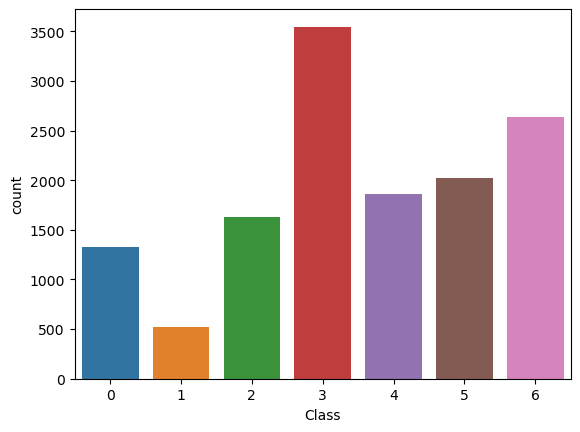

time: 297 ms (started: 2023-05-07 21:13:02 +01:00)


In [21]:
_ = sns.countplot(x='Class', data=df)

In [22]:
#!pip install -U imbalanced-learn

time: 15 ms (started: 2023-05-07 21:13:02 +01:00)


In [23]:
#!pip install -U threadpoolctl

time: 16 ms (started: 2023-05-07 21:13:02 +01:00)


In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 7)


time: 78 ms (started: 2023-05-07 21:13:02 +01:00)


In [25]:
# apply SMOTE to oversample the minority class
X_sm, y_sm=sm.fit_resample(X,y)

time: 1.05 s (started: 2023-05-07 21:13:02 +01:00)


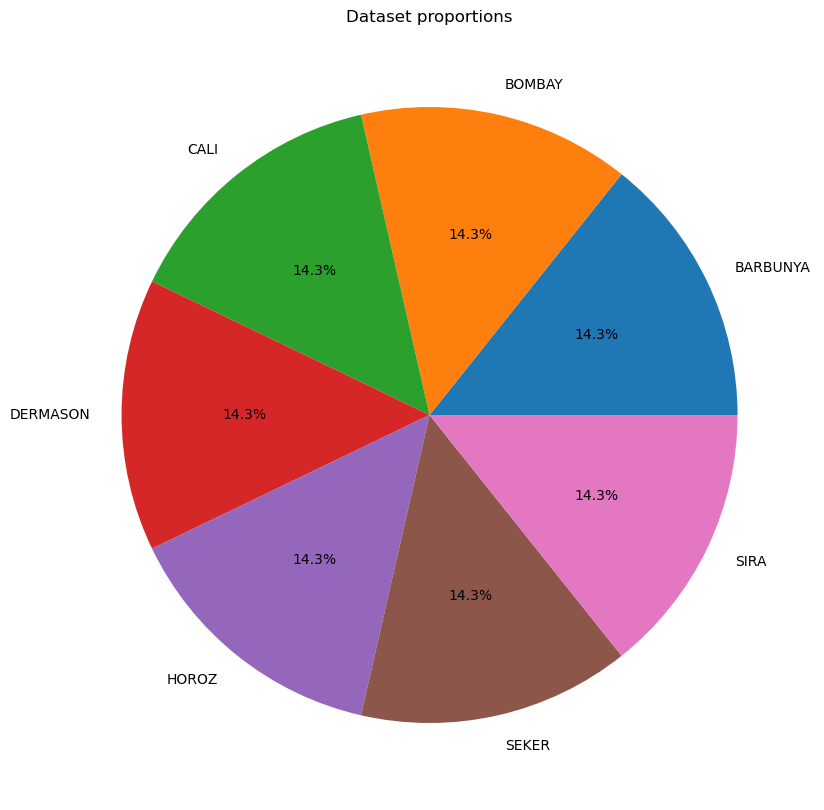

time: 265 ms (started: 2023-05-07 21:13:03 +01:00)


In [26]:
labels, counts = np.unique(y_sm, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

## 4- Pearson linear correlation

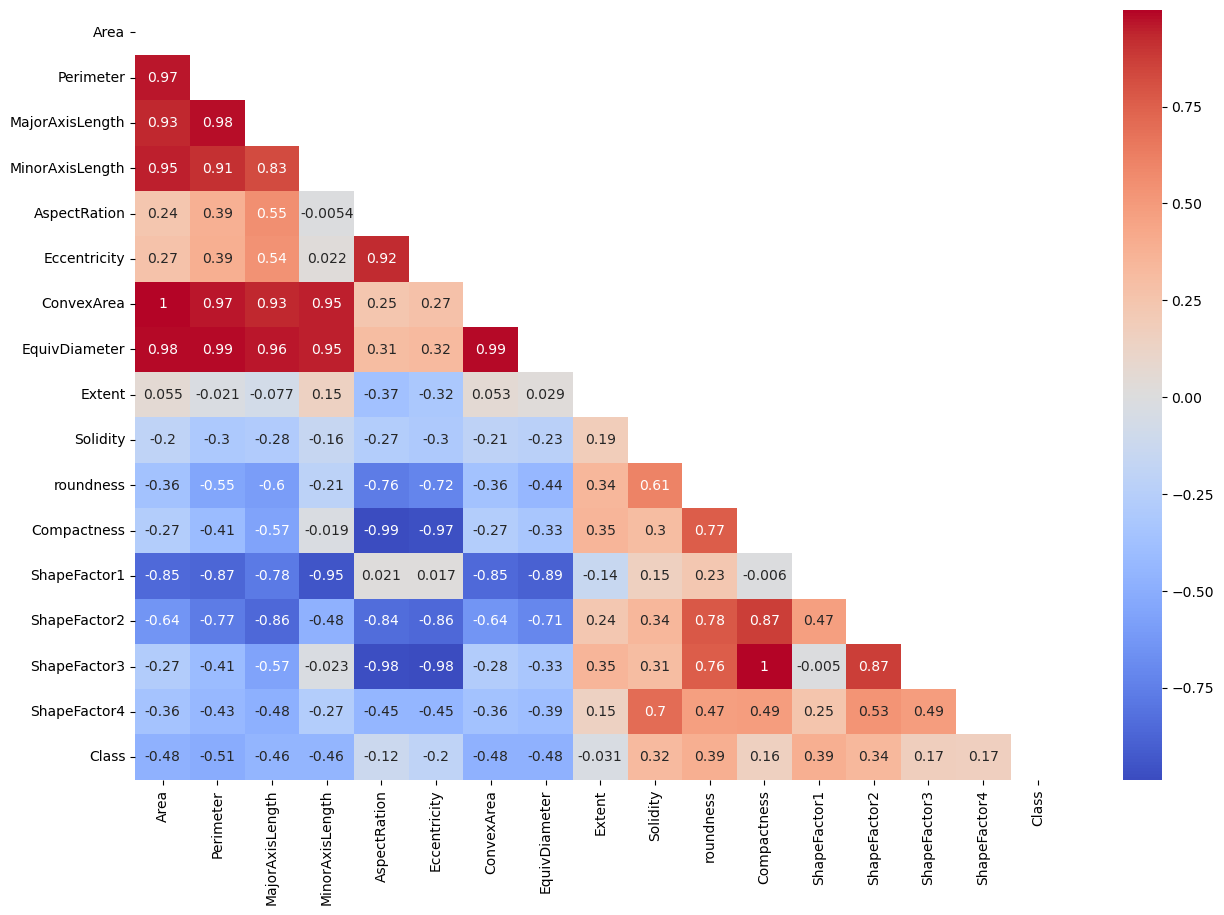

time: 1.12 s (started: 2023-05-07 21:13:04 +01:00)


In [27]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=df.corr(), cmap='coolwarm', mask=np.triu(df.corr()), annot=True)
plt.show()

There are lots of highly correlated features and it was observed that ConvexArea is deeply correlated with Area, Perimeter, MajorAxisLength and MinorAxisLength. EquivDiameter is also over correlated with several features. So we will drop both features.

## Drop over correlated features

In [28]:
X_sm.drop(['ConvexArea', 'EquivDiameter'], axis=1, inplace=True)

time: 15 ms (started: 2023-05-07 21:13:05 +01:00)


In [29]:
X_sm.drop(['ShapeFactor3', 'Perimeter'], axis=1, inplace=True)

time: 15 ms (started: 2023-05-07 21:13:05 +01:00)


In [30]:
X_sm.drop(['MajorAxisLength'], axis=1, inplace=True)

time: 16 ms (started: 2023-05-07 21:13:05 +01:00)


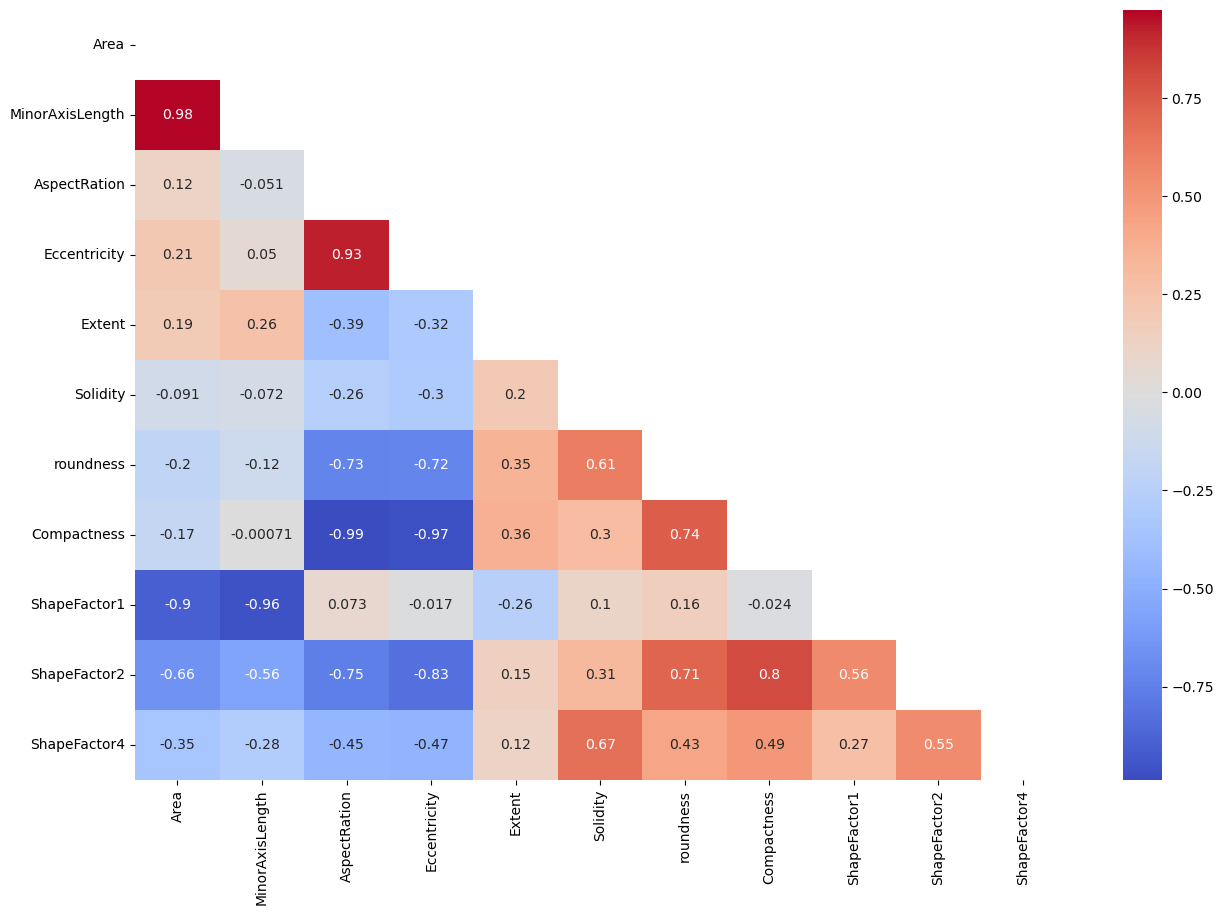

time: 875 ms (started: 2023-05-07 21:13:05 +01:00)


In [31]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=X_sm.corr(), cmap='coolwarm', mask=np.triu(X_sm.corr()), annot=True)
plt.show()

## Data split & normalization

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=42, shuffle=True, test_size=0.2)

time: 16 ms (started: 2023-05-07 21:13:06 +01:00)


In [33]:
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.54149987, -0.98705824,  2.45261931, ...,  1.37937348,
        -0.87068646,  0.50390579],
       [-0.82038784, -0.85277789, -0.79064527, ...,  1.07800792,
         1.26411739,  0.42647347],
       [-0.56668933, -0.54453874, -0.29534879, ...,  0.48554908,
         0.35097552,  0.6043407 ],
       ...,
       [ 2.98587223,  2.63219023,  0.17064007, ..., -2.05802953,
        -1.34322167, -1.3633321 ],
       [ 2.59966281,  2.30252651,  0.31446445, ..., -1.93068778,
        -1.31521726, -0.55102125],
       [ 0.13153035, -0.02655414,  1.30848125, ..., -0.22478978,
        -0.98427651, -1.39053005]])

time: 31 ms (started: 2023-05-07 21:13:06 +01:00)


## Logistic Regression 

### Training the model

In [34]:
model = LogisticRegression(penalty='l2', verbose=1, n_jobs=-1)

time: 0 ns (started: 2023-05-07 21:13:06 +01:00)


In [35]:
model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

time: 15 ms (started: 2023-05-07 21:13:06 +01:00)


In [36]:
LogisticRegression().solver

'lbfgs'

time: 16 ms (started: 2023-05-07 21:13:06 +01:00)


In [37]:
params = {
    'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag'],
    'multi_class':['ovr', 'multinomial']
}
     

time: 15 ms (started: 2023-05-07 21:13:06 +01:00)


In [38]:
clf = GridSearchCV(
    model,
    param_grid=params,
    scoring=f1_score,
    cv=5
)
     

time: 16 ms (started: 2023-05-07 21:13:06 +01:00)


In [39]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, verbose=1),
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag']},
             scoring=<function f1_score at 0x0000021CA78F92D0>)

time: 2min 6s (started: 2023-05-07 21:13:06 +01:00)


In [40]:
model = clf.best_estimator_

time: 0 ns (started: 2023-05-07 21:15:13 +01:00)


In [41]:
y_pred = model.predict(X_test)

time: 0 ns (started: 2023-05-07 21:15:13 +01:00)


In [42]:
y_pred 

array(['DERMASON', 'DERMASON', 'SIRA', ..., 'BOMBAY', 'BOMBAY',
       'BARBUNYA'], dtype=object)

time: 16 ms (started: 2023-05-07 21:15:13 +01:00)


## Test

In [43]:
print(f'The model accuracy is: {np.round(accuracy_score(y_test, y_pred), decimals=3)*100}%')

The model accuracy is: 63.4%
time: 15 ms (started: 2023-05-07 21:15:13 +01:00)


In [44]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Train F1_Score: ", metrics.f1_score(y_train, model.predict(X_train), average='micro'))
print("Test F1_Score: ", metrics.f1_score(y_test, model.predict(X_test), average='weighted'))

Train F1_Score:  0.6234073626428968
Test F1_Score:  0.5809310500842652
time: 422 ms (started: 2023-05-07 21:15:13 +01:00)


<Figure size 1200x1200 with 0 Axes>

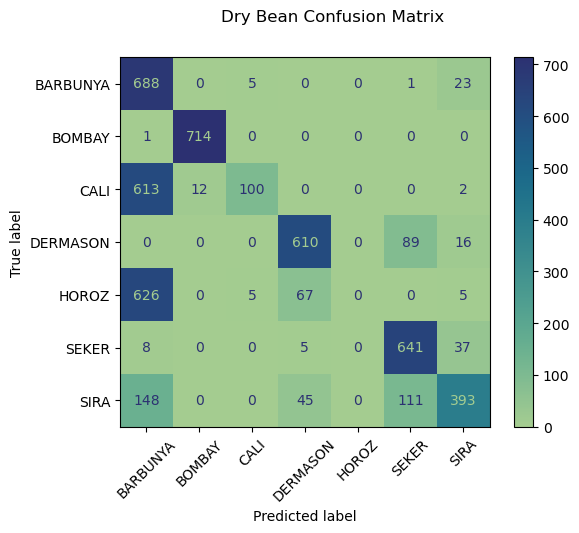

time: 703 ms (started: 2023-05-07 21:15:13 +01:00)


In [45]:
# Displaying Results in Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='crest')
plt.xticks(rotation=45)
plt.suptitle('Dry Bean Confusion Matrix')
plt.show()

## XGBoost

In [46]:
model_xgb= xgb.XGBClassifier(random_state=42,verbosity=0, min_child_weight=2,
                             max_depth=4, learning_rate=0.15, gamma=0.22, colsample_bytree=0.5)


time: 0 ns (started: 2023-05-07 21:15:14 +01:00)


In [47]:
model_xgb.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

time: 16 ms (started: 2023-05-07 21:15:14 +01:00)


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

time: 31 ms (started: 2023-05-07 21:15:14 +01:00)


In [49]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.22, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

time: 11.3 s (started: 2023-05-07 21:15:14 +01:00)


In [50]:
# Make a prediction on the testing data 
y_pred = model_xgb.predict(X_test)

time: 62 ms (started: 2023-05-07 21:15:25 +01:00)


In [51]:
# Get instance IDs for the test set
test_ids=range(len(y_test))

time: 0 ns (started: 2023-05-07 21:15:25 +01:00)


In [52]:
#Define a dictionary to map numeric value to nominal labels
label_dict={0:'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3:'DERMASON', 4:'HOROZ', 5:'SEKER', 6:'SIRA' }

time: 0 ns (started: 2023-05-07 21:15:25 +01:00)


In [53]:
# Convert numeric prediction to nominal labels
y_pred_nominal=[label_dict[val] for val in y_pred]

time: 0 ns (started: 2023-05-07 21:15:25 +01:00)


In [54]:
# create a DataFrame with the IDs and predicted values as columns
pred_df = pd.DataFrame({'id': test_ids, 'prediction_class': y_pred_nominal})

time: 16 ms (started: 2023-05-07 21:15:25 +01:00)


In [55]:
pred_df

,id,prediction_class
0,0,HOROZ
1,1,DERMASON
2,2,SIRA
3,3,CALI
4,4,CALI
...,...,...
4960,4960,SEKER
4961,4961,CALI
4962,4962,BOMBAY
4963,4963,BOMBAY


time: 16 ms (started: 2023-05-07 21:15:25 +01:00)


In [56]:
# save the DataFrame to a CSV file
pred_df.to_csv('prediction.csv', index=False)

time: 31 ms (started: 2023-05-07 21:15:25 +01:00)


In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)

time: 16 ms (started: 2023-05-07 21:15:26 +01:00)


In [58]:
print(f'The model accuracy is: {np.round(accuracy_score(y_test, y_pred), decimals=3)*100}%')

The model accuracy is: 95.39999999999999%
time: 15 ms (started: 2023-05-07 21:15:26 +01:00)


In [59]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Train F1_Score: ", metrics.f1_score(y_train, model_xgb.predict(X_train), average='micro'))
print("Test F1_Score: ", metrics.f1_score(y_test, model_xgb.predict(X_test), average='weighted'))

Train F1_Score:  0.9705897164727804
Test F1_Score:  0.9540034213899024
time: 281 ms (started: 2023-05-07 21:15:26 +01:00)


<Figure size 1200x1200 with 0 Axes>

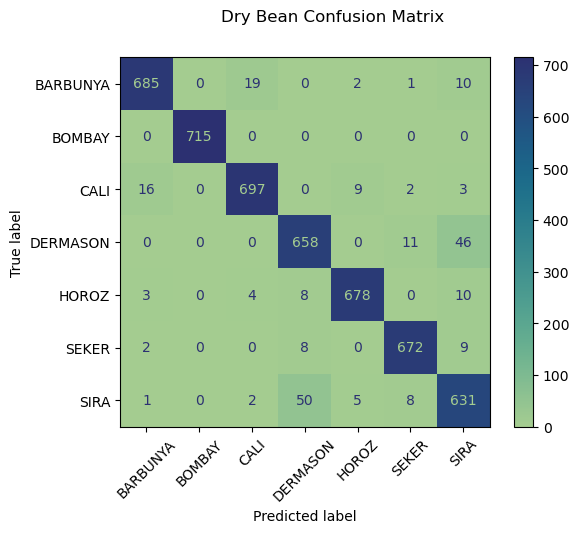

time: 562 ms (started: 2023-05-07 21:15:26 +01:00)


In [62]:
# Displaying Results in Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'])
disp.plot(cmap='crest')
plt.xticks(rotation=45)
plt.suptitle('Dry Bean Confusion Matrix')
plt.show()
